In [1]:
import pandas as pd
from plotnine import *
import datetime

In [2]:
data = pd.read_csv(r"C:\Users\tony9\Downloads\aggregated_data.csv")

In [3]:
data.head()

,day,hour,unique_users_count
0,20,13,249504
1,20,14,362429
2,20,15,442697
3,20,16,426808
4,20,17,471751


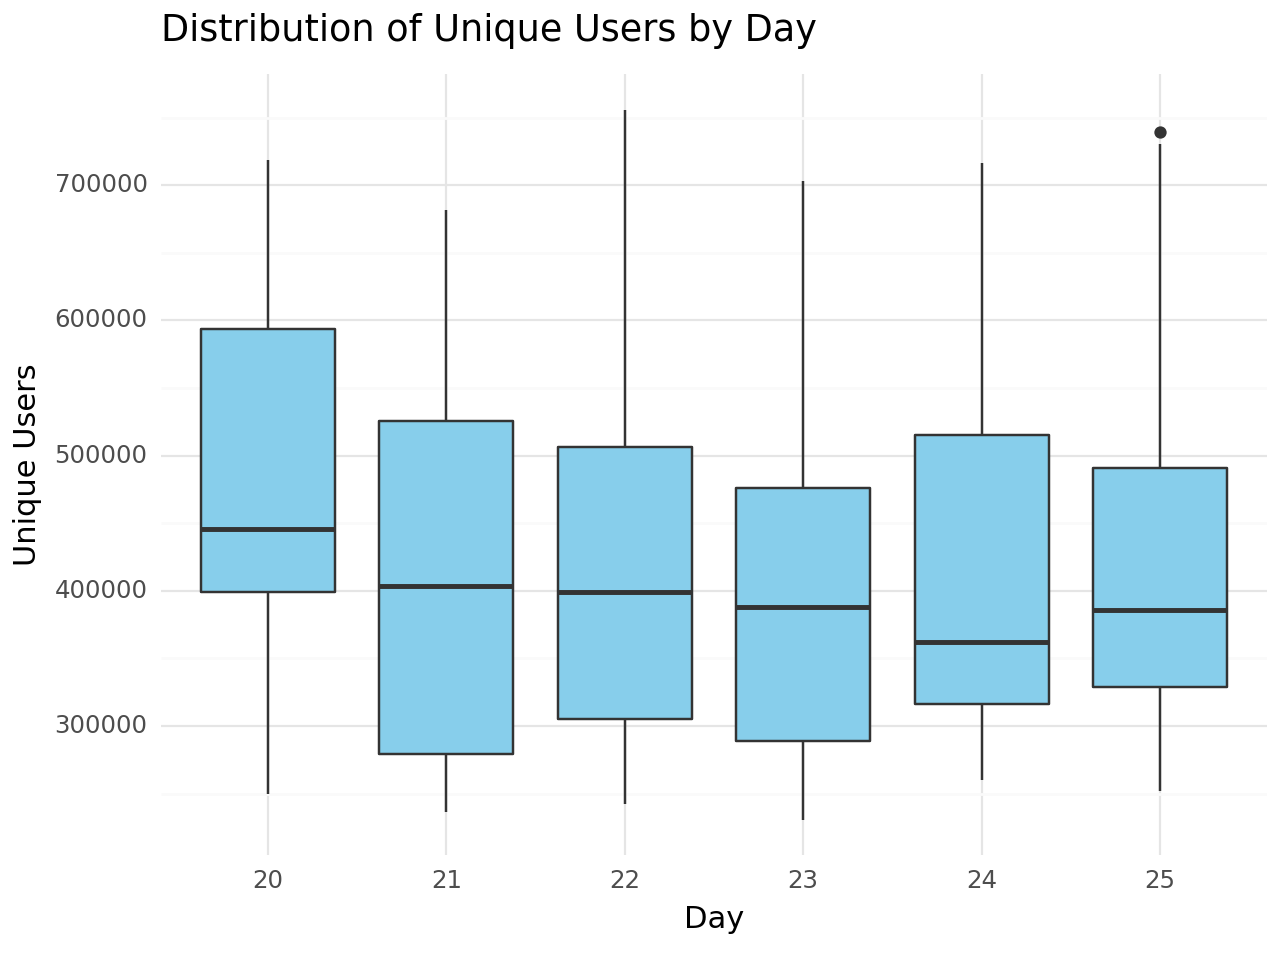

<Figure Size: (640 x 480)>

In [4]:
plot = (
    ggplot(data, aes(x='factor(day)', y='unique_users_count')) +
    geom_boxplot(fill = 'skyblue') +
    theme(
        axis_text_x=element_text(angle=90),
        figure_size=(10, 6)
    ) +
    labs(
        title='Distribution of Unique Users by Day',
        x='Day',
        y='Unique Users'
    ) +
    theme_minimal()
)

plot

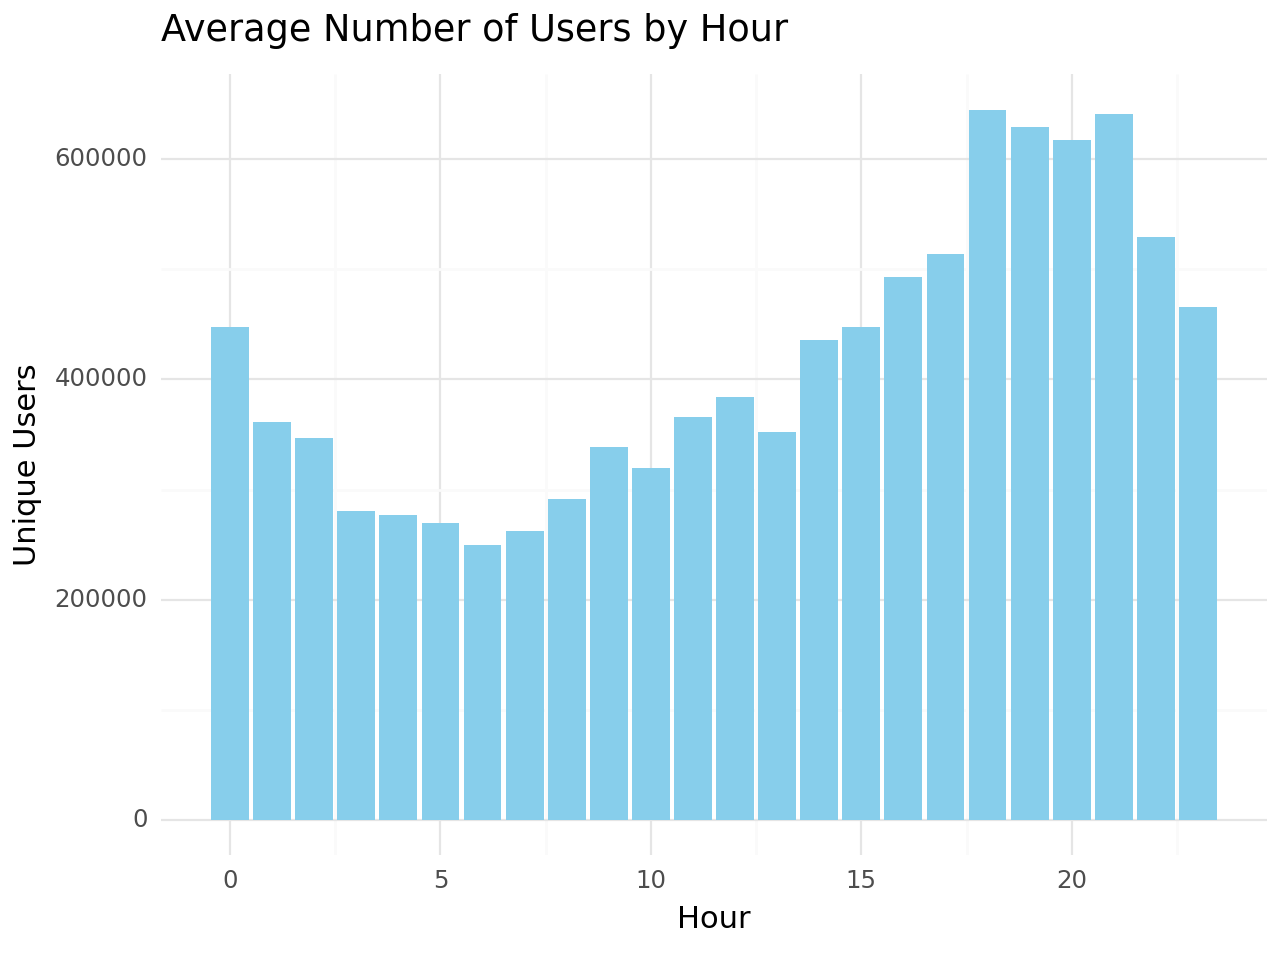

<Figure Size: (640 x 480)>

In [5]:
# Grouping data by hour and calculating the average number of unique users per hour
hourly_average = data.groupby('hour')['unique_users_count'].mean().reset_index()

# Creating a bar plot using ggplot from plotnine
plot = (
    ggplot(hourly_average, aes(x='hour', y='unique_users_count')) +
    geom_bar(stat='identity', fill='skyblue') +
    theme(axis_text_x=element_text(angle=90), figure_size=(10, 6)) +
    labs(
        title='Average Number of Users by Hour',
        x='Hour',
        y='Unique Users'
    )
    + theme_minimal()
)

# Displaying the plot
plot


In [6]:
data_200 = pd.read_csv(r"C:\Users\tony9\Downloads\aggregated_data200.csv")

In [7]:
merged_data = pd.merge(data, data_200, on=['day', 'hour'])

merged_data.head()

,day,hour,unique_users_count,total_pixels_placed
0,20,13,249504,547551
1,20,14,362429,860155
2,20,15,442697,1004266
3,20,16,426808,1026943
4,20,17,471751,1129137


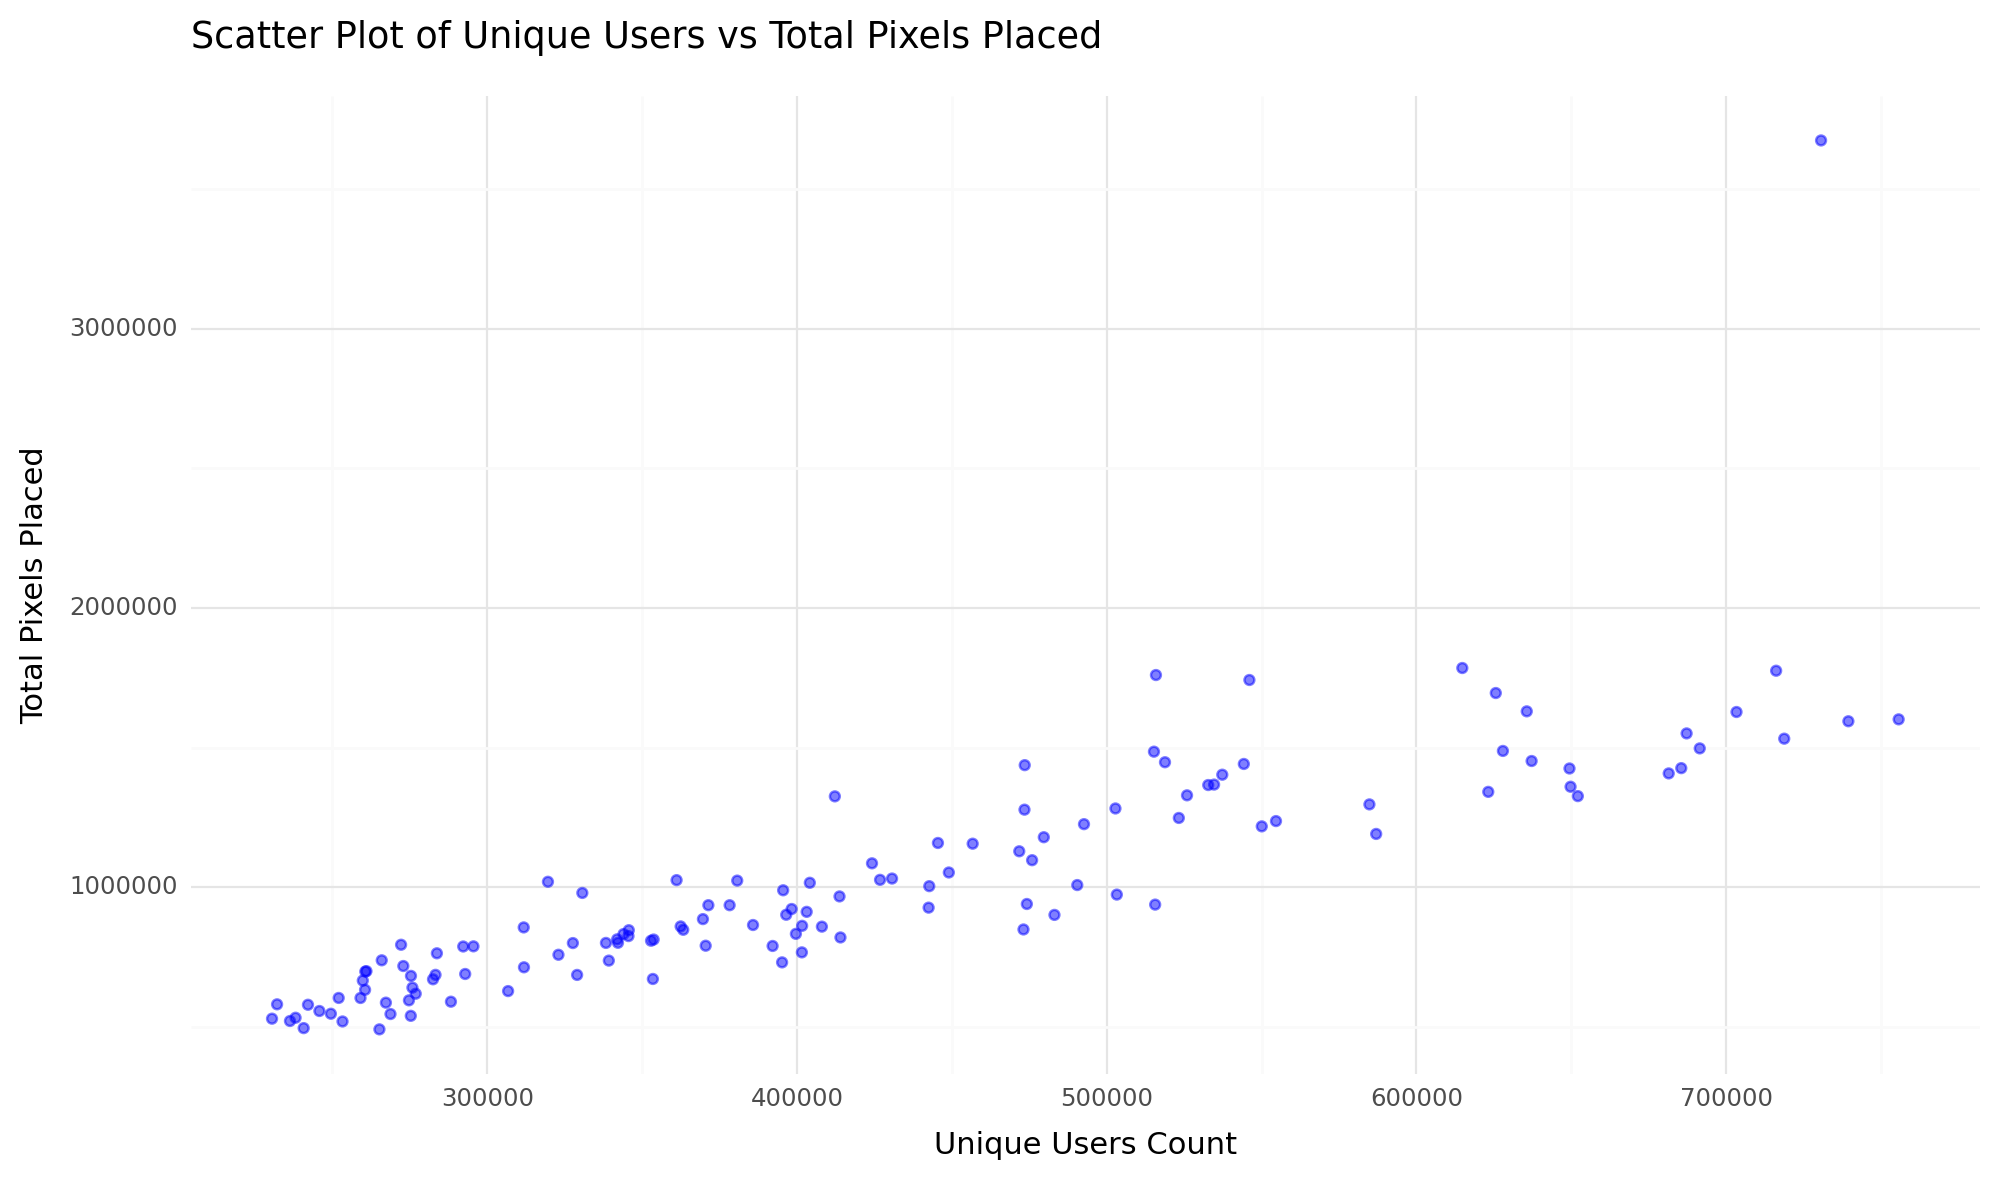

<Figure Size: (1000 x 600)>

In [8]:
plot = (
    ggplot(merged_data, aes(x='unique_users_count', y='total_pixels_placed')) +
    geom_point(color='blue', alpha=0.5) +
    labs(title='Scatter Plot of Unique Users vs Total Pixels Placed',
         x='Unique Users Count',
         y='Total Pixels Placed') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

plot

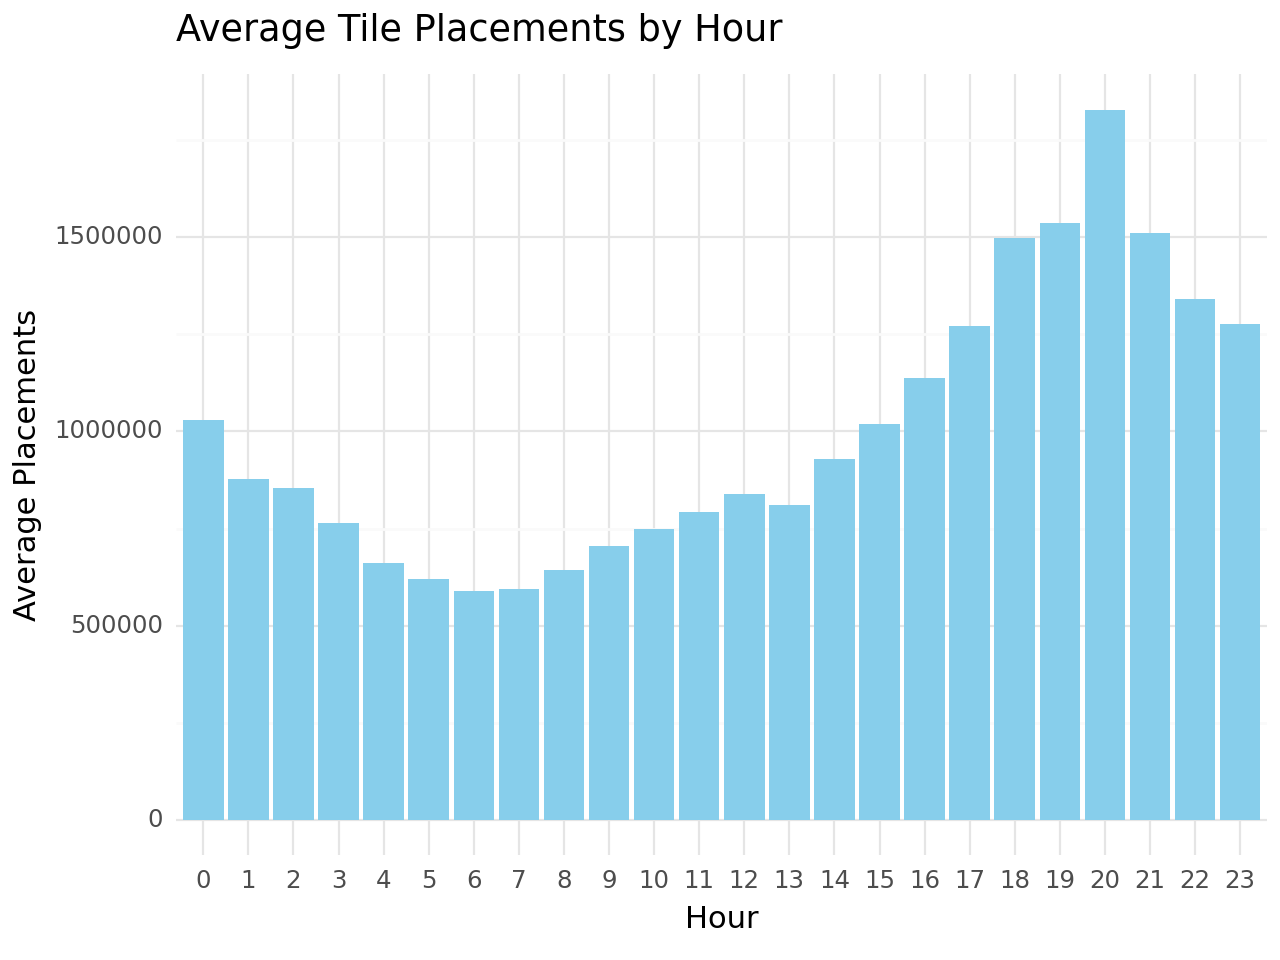

<Figure Size: (640 x 480)>

In [13]:
hourly_average = data_200.groupby('hour')['total_pixels_placed'].mean().reset_index()

plot = (
    ggplot(hourly_average, aes(x='factor(hour)', y='total_pixels_placed')) +
    geom_bar(stat='identity', fill='skyblue') +  # Using geom_bar for bar chart
    theme(axis_text_x=element_text(angle=90), figure_size=(10, 6)) +
    labs(
        title='Average Tile Placements by Hour',
        x='Hour',
        y='Average Placements'
    )
    + theme_minimal()
)

plot


Count of users with at least 21 in frequency: 1


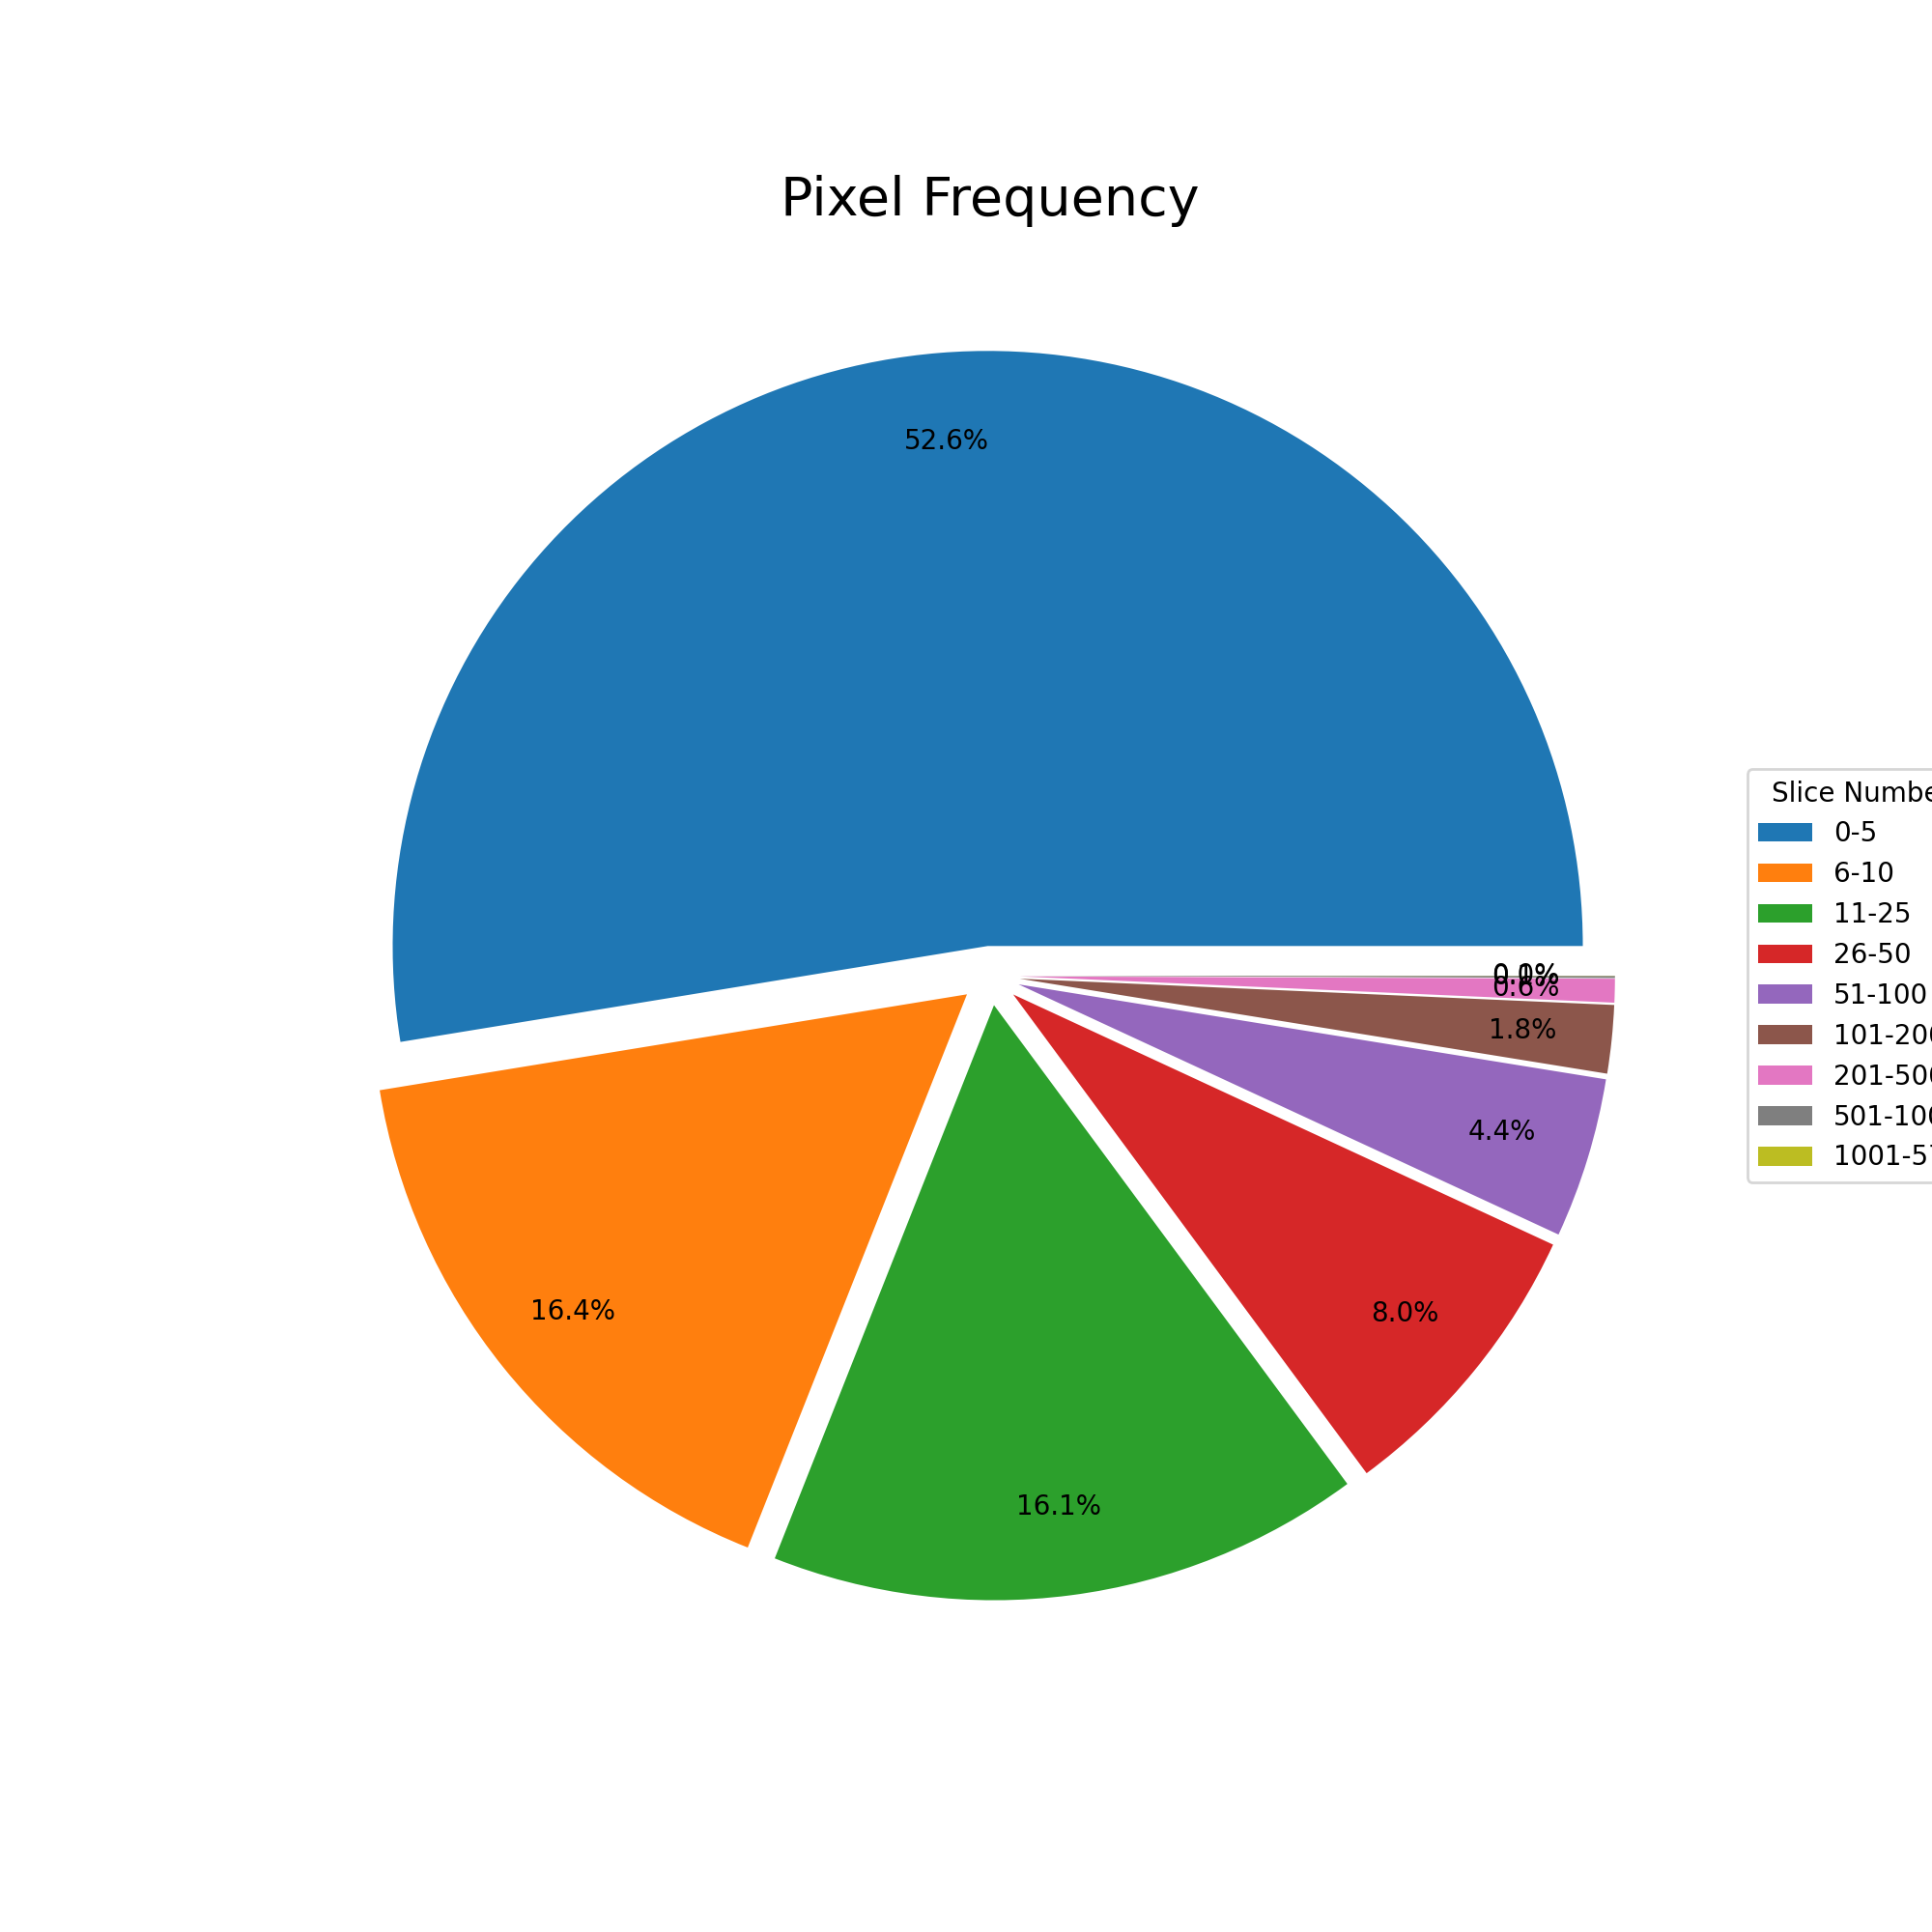

In [14]:
import pandas as pd

# this data comes from previously merged data files in above code. Only unique users & respective frequency columns
data = pd.read_csv(r"C:\Users\tony9\Downloads\rplacemergedcondensed\merged_output.csv")

count_high_frequency = data[data['frequency'] >= 5700].shape[0]
# finding max frequency
print("Count of users with at least 21 in frequency:", count_high_frequency)

import matplotlib.pyplot as plt

bins = [0, 5, 10, 25, 50, 100, 200,500, 1000, 5700]
labels = ['0-5', '6-10','11-25', '26-50', '51-100', '101-200', '201-500','501-1000','1001-5700']
data['frequency_range'] = pd.cut(data['frequency'], bins=bins, labels=labels, right=False)

# Count users in each range
frequency_distribution = data['frequency_range'].value_counts()

# adjusting pie chart output
explode_values = [0.05] * len(frequency_distribution)
plt.figure(figsize=(10, 10))
plt.pie(frequency_distribution, labels=None, autopct='%1.1f%%', pctdistance=0.85, explode=explode_values)
plt.legend(frequency_distribution.index, title="Slice Numbers", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Pixel Frequency', fontsize = 20)

plt.show()

